<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/pil_introduction_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In this notebook, a introduction to Pillow is given. [Pillow](https://pillow.readthedocs.io/en/stable/index.html) is the friendly PIL fork by Alex Clark and Contributors. PIL is the Python Imaging Library by Fredrik Lundh and Contributors.



https://gist.github.com/bradmontgomery/3125124
https://auth0.com/blog/image-processing-in-python-with-pillow/
https://pillow.readthedocs.io/en/3.0.x/handbook/tutorial.html

In [1]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/HappyFish.jpg

--2021-03-07 16:09:11--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/HappyFish.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8283 (8.1K) [image/jpeg]
Saving to: ‘HappyFish.jpg’

HappyFish.jpg       100%[===================>]   8.09K  --.-KB/s    in 0s      

2021-03-07 16:09:11 (76.3 MB/s) - ‘HappyFish.jpg’ saved [8283/8283]



# Pillow: the friendly PIL fork (Python Imaging Library)

[Pillow](https://python-pillow.org/) is a fork of the Python Imaging Library (PIL). PIL is a library that offers several standard procedures for manipulating images. It's a powerful library but hasn't been updated since 2009 and doesn't support Python 3. Pillow builds on this, adding more features and support for Python 3. It supports a range of image file formats such as PNG, JPEG, PPM, GIF, TIFF, and BMP. 

In [3]:
import PIL

print("PIL version: '{}'".format(PIL.__version__))

PIL version: '7.0.0'


In [7]:
from PIL import Image

img = Image.open("/content/HappyFish.jpg")
print(img)
print("Format: '{}', size: '{}', mode: '{}'".format(img.format, img.size, img.mode))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=259x194 at 0x7F94A0A9C650>
Format: 'JPEG', size: '(259, 194)', mode: 'RGB'


In connection with `img.mode`, typical values are "1", "L", "RGB", or "CMYK.".

If the file cannot be opened, an IOError exception is raised.

In [10]:
# If the file cannot be opened, an IOError exception is raised.
try:
  img_2 = Image.open("/content/error.jpg")
except FileNotFoundError:
  print("The image does not exist")

The image does not exist


In [12]:
# Save on disk a copy of the image:
img.save("HappyFishCopy.jpg")

When saving an image, you can specify a different extension from its original, and the saved image will be converted to the specified format. In the following case, Pillow sees the file extension has been specified as PNG and so it converts it to PNG before saving it to file.

In [36]:
img.save("HappyFishCopyPng.png")

In [17]:
# Resize the image (width, height)
img_resized = img.resize((400, 200))
print(img_resized)

<PIL.Image.Image image mode=RGB size=400x200 at 0x7F94976CBF50>


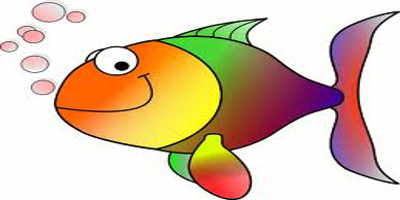

In [18]:
from IPython.display import display

display(img_resized)

In [25]:
# The region is defined by a 4-tuple, where coordinates are (left, upper, right, lower).
box = (100, 0, 400, 200)
region = img_resized.crop(box)
print(region)

<PIL.Image.Image image mode=RGB size=300x200 at 0x7F94A31CD410>


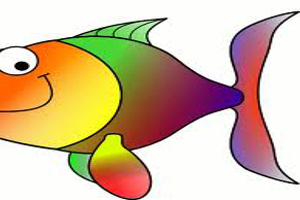

In [26]:
display(region)

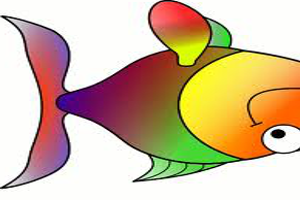

In [28]:
region_trans = region.transpose(Image.ROTATE_180)
display(region_trans)

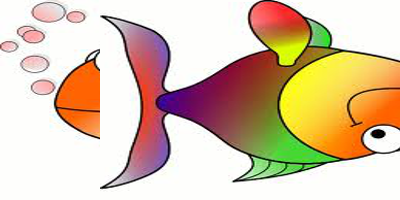

In [31]:
# When pasting regions back, the size of the region must match the given region exactly. 
# In addition, the region cannot extend outside the image. 

img_resized.paste(region_trans, box)
display(img_resized)

In [32]:
r_chan, g_chan, b_chan = img.split()
print(r_chan)

<PIL.Image.Image image mode=L size=259x194 at 0x7F94976CBFD0>


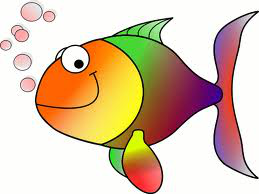

In [35]:
reconstructed_img = Image.merge("RGB", (r_chan, g_chan, b_chan))
display(reconstructed_img)

# Convert PIL to OpenCV format

In [47]:
import numpy as np
import cv2

In [56]:
%%time
img_rgb = np.array(reconstructed_img)

CPU times: user 1.62 ms, sys: 0 ns, total: 1.62 ms
Wall time: 1.46 ms


In [57]:
%%time
img_rgb_2 = np.asarray(reconstructed_img)

CPU times: user 271 µs, sys: 0 ns, total: 271 µs
Wall time: 280 µs


In [58]:
%%time
img_bgr = img_rgb[:, :, ::-1].copy()

CPU times: user 148 µs, sys: 1.03 ms, total: 1.18 ms
Wall time: 663 µs


In [59]:
%%time
img_bgr_2 = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

CPU times: user 106 µs, sys: 13 µs, total: 119 µs
Wall time: 136 µs


In [60]:
img_bgr_3 = cv2.cvtColor(img_rgb_2, cv2.COLOR_RGB2BGR)

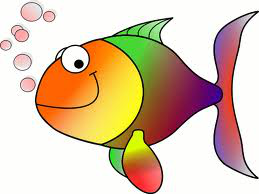

In [45]:
from google.colab.patches import cv2_imshow

cv2_imshow(img_bgr)

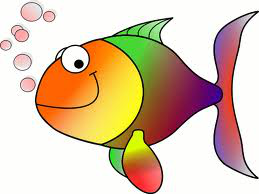

In [46]:
cv2_imshow(img_bgr_2)

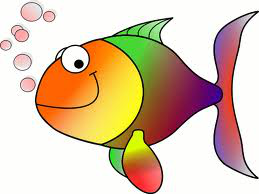

In [61]:
cv2_imshow(img_bgr_3)

# Convert OpenCV format to PIL

In [54]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(img_rgb)

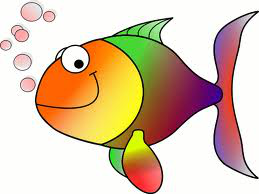

In [55]:
display(pil_image)